# Exercise 3: Binary search tree

In [5]:
# Implement binary search tree class
class Tree:
    def __init__(self, value = None, data = None):
        self._value = value # patient_id; sort by this
        self._data = data # Additional patient information
        self.left = None
        self.right = None

    # Insert a value and associated data into the tree
    def add(self, value, data):
        # Check if root is empty
        if self._value is None:
            self._value = value # Add patient_id to empty node
            self._data = data # Add data to empty node
        # Check if value is smaller than root
        elif value < self._value:
            if self.left is None:
                self.left = Tree() # Create new left child node
            self.left.add(value, data) # Insert value in left child node
        # Check if value is larger than root
        elif value > self._value:
            if self.right is None:
                self.right = Tree() # Create new right child node
            self.right.add(value, data) # Insert value in right child node
        else:
            self._data = data # Update data in existing node

    # Recursive method asking if tree or sub-tree contains a value        
    def __contains__(self, patient_id):
        if self._value == patient_id:
            return True
        elif self.left and patient_id < self._value:
            return patient_id in self.left
        elif self.right and patient_id > self._value:
            return patient_id in self.right
        else:
            return False

In [10]:
# Test the class
my_tree = Tree()
for patient_id, initials in [(24601, "JV"), (42, "DA"), (7, "JB"), (143, "FR"), (8675309, "JNY")]:
    my_tree.add(patient_id, initials)

print(24601 in my_tree)
print(1492 in my_tree)

True
False


In [16]:
# Check if a given tree has a given piece of patient data
def has_data(tree, data):
    # If the current node is empty, return false
    if tree is None:
        return False
    
    # If the current node has the data, then we're good 
    if tree._data == data:
        return True
    
    # Recursively check if the left sub-tree or right sub-tree has the data
    return has_data(tree.left, data) or has_data(tree.right, data)

# Test the function
print(has_data(my_tree, "JV"))
print(has_data(my_tree, 24601))

True
False


In [38]:
# Calculate performance for __contains__() and has_data()
import random
import time
import numpy as np

tree_sizes = [10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000]
contains_times = []
has_data_times = []

for tree_size in tree_sizes:
    # Generate random patient_ids and random patient data
    patient_data = [(random.randint(1, tree_size * 10), f"{i}") for i in range(tree_size)]

    # Create tree and populate with random patient_ids and random patient data
    tree = Tree()
    for patient_id, data in patient_data:
        tree.add(patient_id, data)

    # Test performance of __contains__()
    start_time = time.time()
    for i in range(1000):
        i = random.randint(1, tree_size) in tree
    contains_times.append( (time.time() - start_time) / 1000)

    # Test performance of has_data()
    start_time = time.time()
    for i in range(1000):
        i = has_data(tree, f"{i}")
    has_data_times.append( (time.time() - start_time) / 1000)

Text(0, 0.5, 'log(time)')

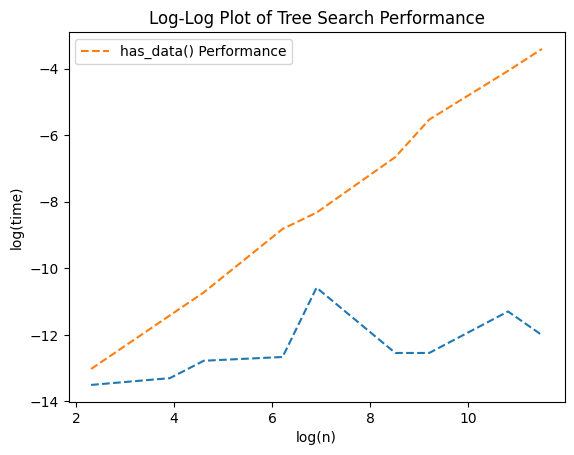

In [53]:
# Plot performance for __contains__() and has_data()
import seaborn as sns
import warnings

warnings.filterwarnings('ignore') # Suppress seaborn's warnings

plot = sns.lineplot(x = np.log(tree_sizes), y = np.log(contains_times), label = "__contains__() Performance", linestyle = "--")
sns.lineplot(x = np.log(tree_sizes), y = np.log(has_data_times), label = "has_data() Performance", linestyle = "--", ax = plot)
plot.set_title("Log-Log Plot of Tree Search Performance")
plot.set_xlabel("log(n)")
plot.set_ylabel("log(time)")

In [42]:
# Analyze time complexity for tree instantiation
tree_sizes = [10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000]
setup_times = []

for tree_size in tree_sizes:
    patient_data = [(random.randint(1, tree_size * 10), f"Data_{i}") for i in range(tree_size)]

    start_time = time.time()
    tree = Tree()
    for patient_id, data in patient_data:
        tree.add(patient_id, data)
    setup_times.append(time.time() - start_time)

# Calculate O(n) and O(n^2) for defined tree sizes
o_n = [x for x in tree_sizes]
o_n_squared = [x**2 for x in tree_sizes]

Text(0.5, 1.0, 'Time Complexity Plot of Tree Instantiation Performance')

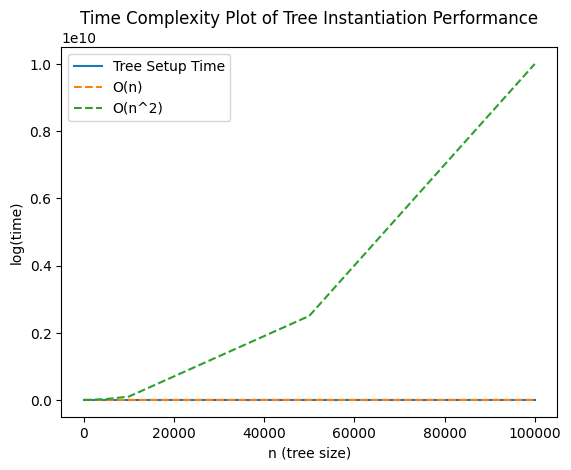

In [52]:
# Plot time complexity for tree instantiation
plot = sns.lineplot(x = tree_sizes, y = setup_times, label = "Tree Setup Time")
sns.lineplot(x = tree_sizes, y = o_n, label = "O(n)", linestyle = "--", ax = plot)
sns.lineplot(x = tree_sizes, y = o_n_squared, label = "O(n^2)", linestyle = "--", ax = plot)
plot.set_xlabel("n (tree size)")
plot.set_ylabel("log(time)")
plot.set_title("Time Complexity Plot of Tree Instantiation Performance")